# Отчет: задание 5

*Неверо Андрей, лабораторная работа 1, 2 курс, 4 группа*

В задании требовалось написать программу, которая с помощью метода релаксации решает системы уравнений вида:

$$ A = \begin{bmatrix}
    n & 1 & 1 & \ldots & 1 & 1 & 1 \\
    1 & n & 0 & \ldots & 0 & 0 & 1 \\
    1 & 0 & n & \ldots & 0 & 0 & 1 \\
    \ldots & \ldots & \ldots & \ldots & \ldots & \ldots & \ldots \\
    1 & 0 & 0 & \ldots & n & 0 & 1 \\
    1 & 0 & 0 & \ldots & 0 & n & 1 \\
    1 & 1 & 1 & \ldots & 1 & 1 & n
\end{bmatrix}, \quad B = \begin{bmatrix}
    1 \\
    1 \\
    1 \\
    \ldots \\
    1 \\
    1 \\
    1
\end{bmatrix} $$

Решением данной задачи можно считать реализацию метода *SolveSystem* класса Task5 (см. соответствующий заголовочный файл).

Методы, связанные с обработкой связанных с этим заданием данных, определены в этом же классе.

## Составление уравнения итераций

Нетрудно заметить, что для матрицы $A$ выполнено достаточное условие сходимости метода релаксации (она является симметрической и положительно определенной). Составим уравнение метода Якоби, на базе которого построим уравнения метода релаксации.

$$ B = \begin{bmatrix}
    0 & -\frac{1}{n} & -\frac{1}{n} & \ldots & -\frac{1}{n} & -\frac{1}{n} & -\frac{1}{n} \\
    -\frac{1}{n} & 0 & 0 & \ldots & 0 & 0 & -\frac{1}{n} \\
    -\frac{1}{n} & 0 & 0 & \ldots & 0 & 0 & -\frac{1}{n} \\
    \ldots & \ldots & \ldots & \ldots & \ldots & \ldots & \ldots \\
    -\frac{1}{n} & 0 & 0 & \ldots & 0 & 0 & -\frac{1}{n} \\
    -\frac{1}{n} & 0 & 0 & \ldots & 0 & 0 & -\frac{1}{n} \\
    -\frac{1}{n} & -\frac{1}{n} & -\frac{1}{n} & \ldots & -\frac{1}{n} & -\frac{1}{n} & 0
\end{bmatrix}, \quad g = \begin{bmatrix}
    \frac{1}{n} \\
    \frac{1}{n} \\
    \frac{1}{n} \\
    \ldots \\
    \frac{1}{n} \\
    \frac{1}{n} \\
    \frac{1}{n}
\end{bmatrix} $$

Имеем:

$$ X^{k + 1} = B X^{k} + g $$

Нетрудно теперь получить и уравнение метода релаксации.

## Свойства вектора $X^k$

Заметим, что вектор $X^k$ обладает весьма специфичным свойством: все его элементы, кроме первого и последнего, попарно равны между собой (что при применении метода Якоби, что при применении методов Гаусса-Зейделя или релаксации). Действительно, рассмотрим вычисление некоторого $x^{k}_{i}$. Матрица $B$ имеет такой вид, что значение $x^{k}_{i}$ зависит только от значений $x^{k}_{0}$, $x^{k}_{0}$ и $x^{k}_{n - 1}$. Для его вычисления при использовании метода релаксации можно использовать формулу:

$$ x^{k}_{i} = \frac{1}{n} - \frac{\omega x^{k}_{0}}{n} - \frac{(1 - \omega) x^{k - 1}_{0}}{n} - \frac{x^{k - 1}_{n - 1}}{n} = \frac{1 - \omega x^{k}_{0} - (1 - \omega) x^{k - 1}_{0} - x^{k - 1}_{n - 1}}{n}, \quad \forall k = \overline{1, \ n - 2} $$

Формулы для нахождения первой и последней координаты вектора также достаточно очевидны.

$$ x^{k}_{0} = \frac{1}{n} - \frac{1}{n} \sum_{i = 1}^{n - 1} x^{k - 1}_{i} = \frac{1}{n} - \frac{x^{k - 1}_{n - 1}}{n} - \frac{(n - 2) x^{k - 1}_{i}}{n} = \frac{1 - x^{k - 1}_{n - 1} - (n - 2) x^{k - 1}_{i}}{n}, \quad \forall i = \overline{1, \ n - 2} $$

$$ x^{k}_{n - 1} = \omega \left(\frac{1}{n} - \frac{1}{n} \sum_{i = 0}^{n - 2} x^{k}_{i}\right) + (1 - \omega) \left(\frac{1}{n} - \frac{1}{n} \sum_{i = 0}^{n - 2} x^{k - 1}_{i}\right) = \frac{1}{n} - \frac{(n - 2) \left(\omega x^{k}_{i} + (1 - \omega) x^{k - 1}_{i}\right)}{n} - \frac{\omega x^{k}_{0} + (1 - \omega) x^{k - 1}_{0}}{n} = $$

$$ = \frac{1 - (n - 2) \left(\omega x^{k}_{i} + (1 - \omega) x^{k - 1}_{i}\right) - \omega x^{k}_{0} - (1 - \omega) x^{k - 1}_{0}}{n}, \quad \forall i = \overline{1, \ n - 2} $$

## Основная идея алгоритма

Как видно, на каждой итерации нам достаточно хранить и проводить какие-то действия только над тремя элементами решения: над нулевым, над последним и над произвольным из оставшихся. Соответственно, алгоритм чрезвычайно прост: необходимо постоянно вычислять новые значения этих трех координат, используя приведенные выше формулы. Нетрудно видеть, что асимптотика одной итерации будет константной.

## Проверка критерия остановки итераций

По условию задачи, критерий остановки итераций выглядит как:

$$ \|A X^{k} - b\| < 10^{-10} $$

Перемножение матрицы $A$ на вектор $X^{k}$ работает с асимптотикой $O(n^2)$. Воспользуемся свойствами матрицы и вектора, чтобы уменьшить асимптотику до константной.

Нетрудно заметить, что нам достаточно посчитать три элемента итогового вектора: первый, последний и произвольный между ними. Имеем:

$$ y^{k}_{0} = n x^{k}_{0} + (n - 2) x^{k}_{i} + x^{k}_{n - 1}, \quad \forall i = \overline{1, \ n - 2} $$

$$ y^{k}_{i} = x^{k}_{0} + n x^{k}_{j} + x^{k}_{n - 1}, \quad \forall i, j = \overline{1, \ n - 2} $$

$$ y^{k}_{n - 1} = x^{k}_{0} + (n - 2) x^{k}_{i} + n x^{k}_{n - 1}, \quad \forall i = \overline{1, \ n - 2} $$

Если использовать максимум-норму, то критерий остановки итераций можно записать в виде:

$$ \begin{cases}
    \left|y^{k}_{0} - 1\right| < 10^{-10} \\
    \left|y^{k}_{i} - 1\right| < 10^{-10} \\
    \left|y^{k}_{n - 1} - 1\right| < 10^{-10}
\end{cases} $$

Как видно, проверить условия можно за константное время.

## Результаты для некоторых $n$

В условии задачи требуется привести результаты работы алгоритма для $n = 500$, $n = 1000$, $n = 2000$, $n = 4000$.

$$ n = 500 \colon \quad \begin{bmatrix}
    0.0000080159 \\
    0.0019999679 \\
    0.0019999679 \\
    \ldots \\
    0.0019999679 \\
    0.0019999679 \\
    0.0000080159
\end{bmatrix} $$

$$ n = 1000 \colon \quad \begin{bmatrix}
    0.0000020020 \\
    0.0009999960 \\
    0.0009999960 \\
    \ldots \\
    0.0009999960 \\
    0.0009999960 \\
    0.0000020020
\end{bmatrix} $$

$$ n = 2000 \colon \quad \begin{bmatrix}
    0.0000005002 \\
    0.0004999995 \\
    0.0004999995 \\
    \ldots \\
    0.0004999995 \\
    0.0004999995 \\
    0.0000005002
\end{bmatrix} $$

$$ n = 4000 \colon \quad \begin{bmatrix}
    0.0000001250 \\
    0.0002499999 \\
    0.0002499999 \\
    \ldots \\
    0.0002499999 \\
    0.0002499999 \\
    0.0000001250
\end{bmatrix} $$


## Анализ скорости работы алгоритма при разных $\omega$

Проанализируем количество итераций для пяти значений $\omega$: $0.0, 0.5, 1.0, 1.5, 2.0$. Запустим алгоритм поиска решения для матриц размером $n = 50k$ до $4000$.

Вертикальная ось графика - количество итераций, горизонтальная - размер матрицы. Расшифровки цветов графика (какой цвет соответствует конкретному $\omega$) см. в коде, который отвечает за отрисовку графика.

In [1]:
from data import task5
import matplotlib
%matplotlib inline

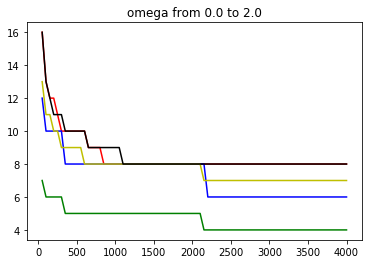

In [2]:
bins = [i for i in range(50, 4001, 50)]
matplotlib.pyplot.title("omega from 0.0 to 2.0")
matplotlib.pyplot.plot(bins, task5.omega_0_0_iterations, 'r',
                       bins, task5.omega_0_5_iterations, 'b',
                       bins, task5.omega_1_0_iterations, 'g',
                       bins, task5.omega_1_5_iterations, 'y',
                       bins, task5.omega_2_0_iterations, 'k')
matplotlib.pyplot.show()

Нетрудно видеть, что лучше всего себя показывает значение $\omega = 1.0$. Рассмотрим близкие к нему значения $\omega$: $0.8, 1.0, 1.2$.

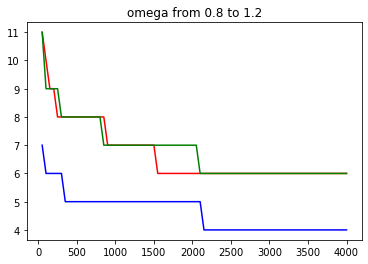

In [3]:
matplotlib.pyplot.title("omega from 0.8 to 1.2")
matplotlib.pyplot.plot(bins, task5.omega_0_8_iterations, 'r',
                       bins, task5.omega_1_0_iterations, 'b',
                       bins, task5.omega_1_2_iterations, 'g')
matplotlib.pyplot.show()

Как видно, значение $\omega = 1$ все равно является наилучшим (то есть фактически метод релаксации сводится к методу Гаусса-Зейделя).

Для обоснования данного факта можно попробовать проанализировать собственные значения матрицы итераций (оптимальное значение $\omega$ зависит от них).